# Handwritten Digit recognition using CNN

# import the libararies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing data

In [2]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Create the model

In [3]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model

In [4]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.1373 - loss: 2.2904 - val_accuracy: 0.4264 - val_loss: 2.2205
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2972 - loss: 2.2115 - val_accuracy: 0.6772 - val_loss: 2.1202
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4530 - loss: 2.1109 - val_accuracy: 0.7180 - val_loss: 1.9780
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5552 - loss: 1.9693 - val_accuracy: 0.7507 - val_loss: 1.7793
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6116 - loss: 1.7795 - val_accuracy: 0.7803 - val_loss: 1.5283
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6480 - loss: 1.5543 - val_accuracy: 0.8027 - val_loss: 1.2619
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6814 - loss: 1.3245 - val_accuracy: 0.8208 - val_loss: 1.0319
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7082 - loss: 1.1369 - val_accuracy:

The model has successfully trained
Saving the model as mnist.h5


# Evaluate the model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6516370177268982
Test accuracy: 0.8561000227928162


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,142,816 (27.25 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,761,878 (18.17 MB)

#  Predict digits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


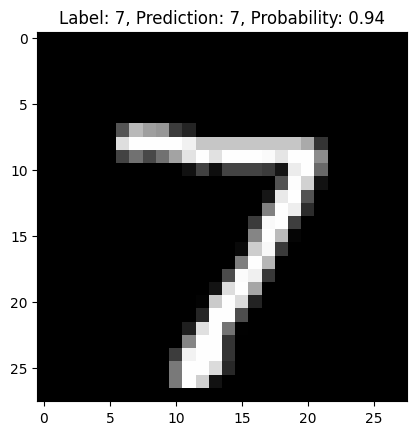

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


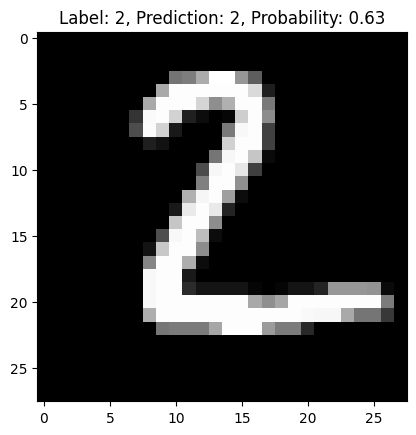

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


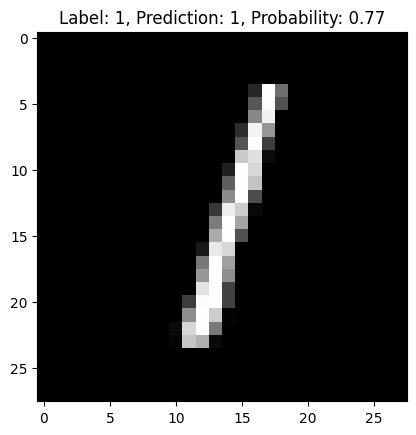

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


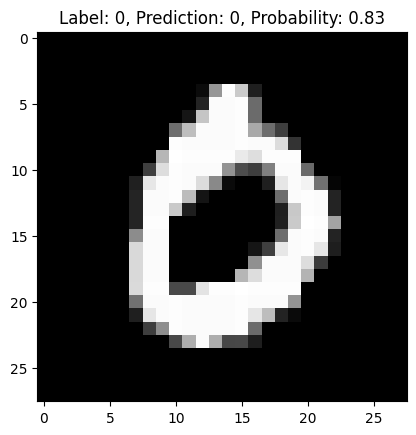

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


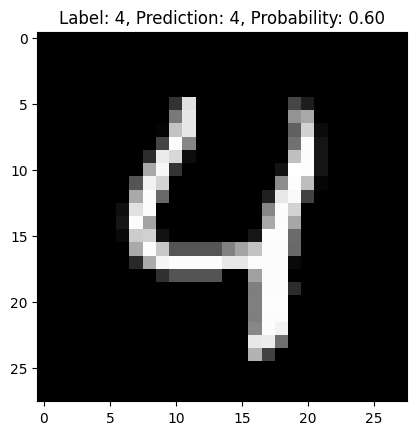

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


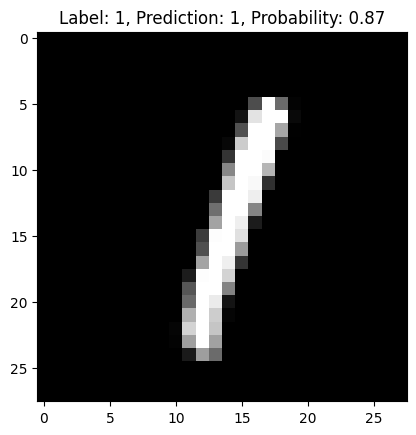

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


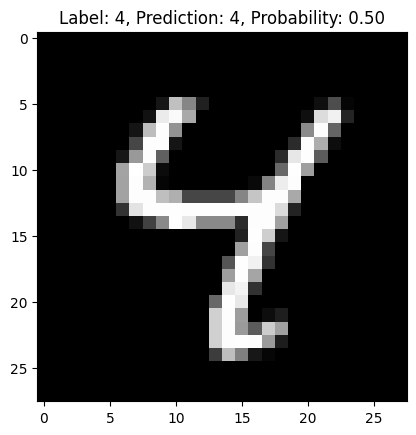

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


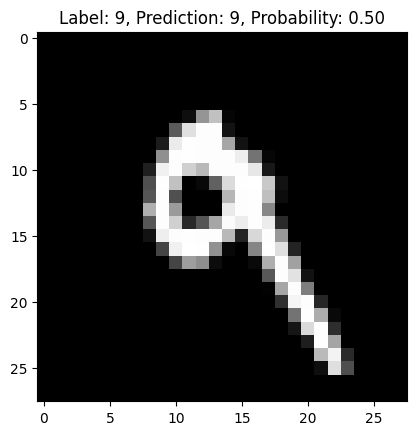

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


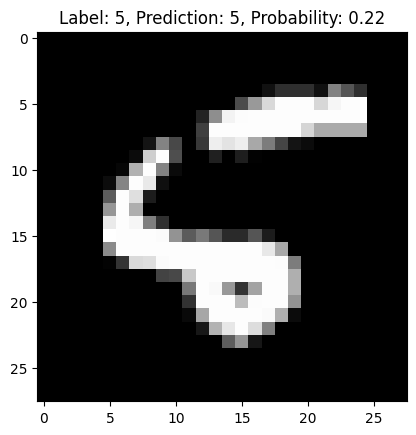

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


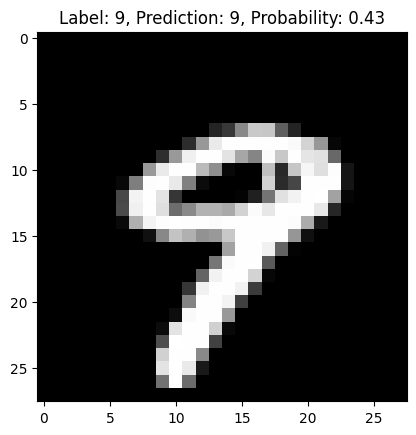

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


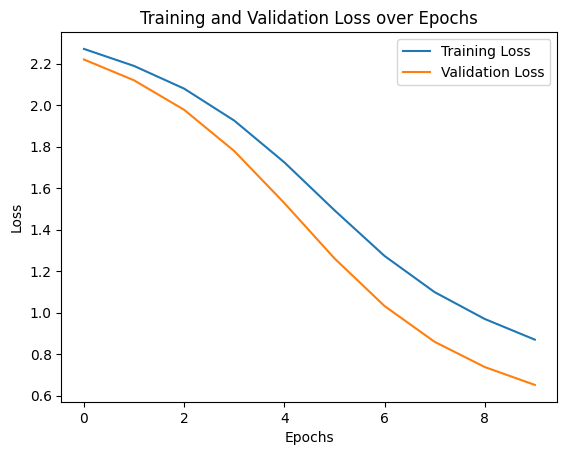

In [8]:
# Plot both validation loss and training loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 1 with 20 epochs

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 20
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))
model_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [12]:
hist_2=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_2.save('mnist_2.h5')
print("Saving the model as mnist_2.h5")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1365 - loss: 2.2941 - val_accuracy: 0.3536 - val_loss: 2.2588
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2390 - loss: 2.2525 - val_accuracy: 0.5878 - val_loss: 2.2067
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3641 - loss: 2.2029 - val_accuracy: 0.7068 - val_loss: 2.1374
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4709 - loss: 2.1322 - val_accuracy: 0.7493 - val_loss: 2.0387
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5522 - loss: 2.0325 - val_accuracy: 0.7684 - val_loss: 1.8948
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6122 - loss: 1.8838 - val_accuracy: 0.7826 - val_loss: 1.6901
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6435 - loss: 1.6900 - val_accuracy: 0.7960 - val_loss: 1.4352
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6695 - loss: 1.4625 - val_accuracy: 0

The model has successfully trained
Saving the model as mnist_2.h5


In [13]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4167585074901581
Test accuracy: 0.8888999819755554


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


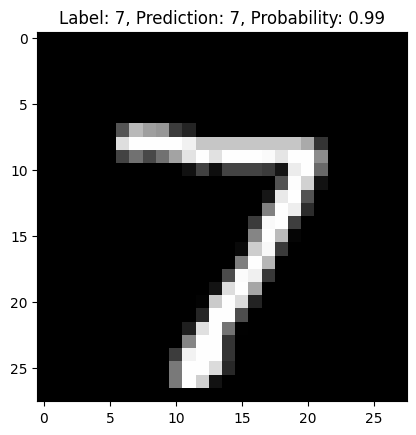

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


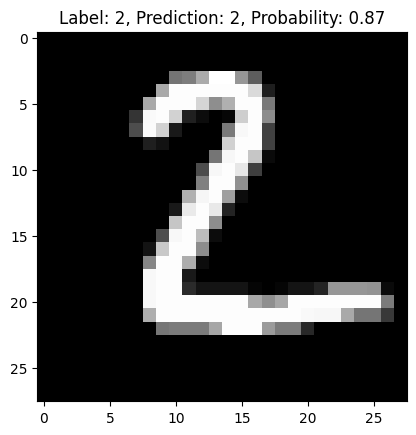

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


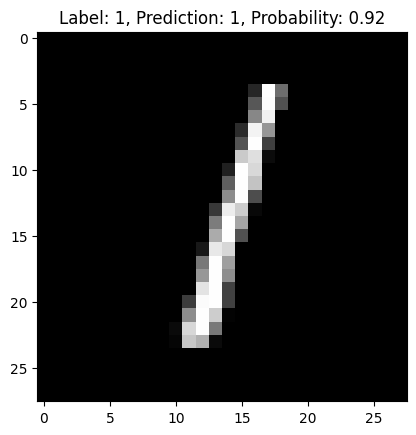

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


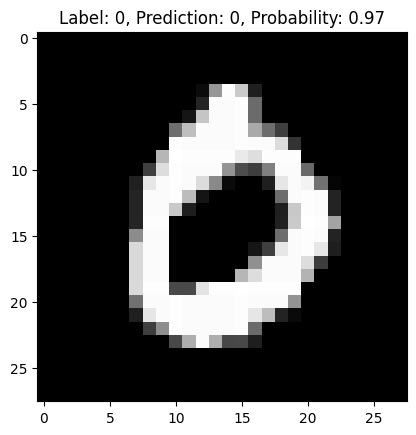

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


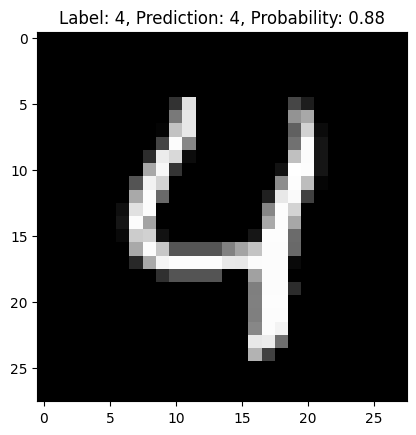

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


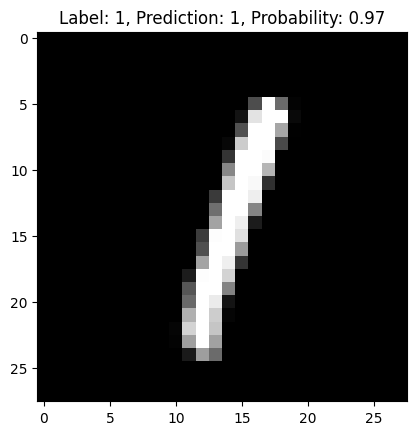

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


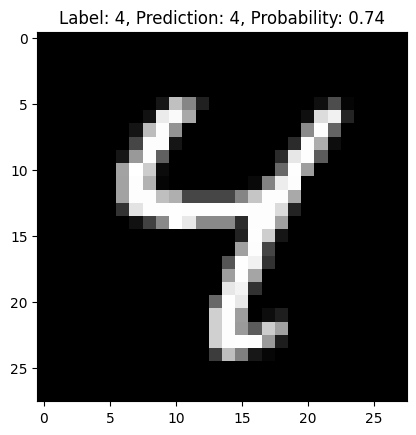

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


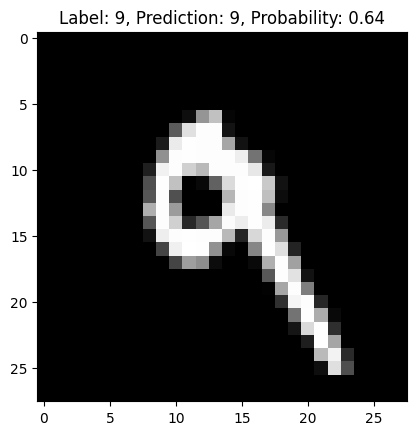

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


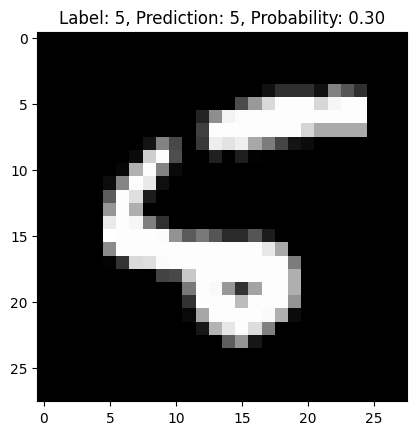

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


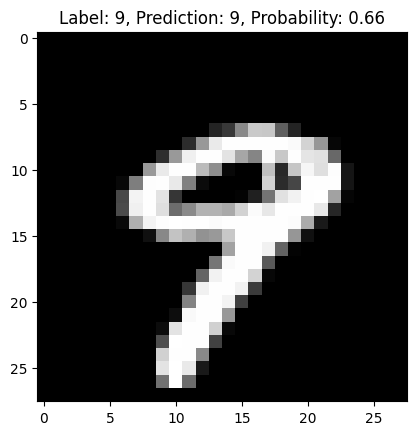

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_2.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


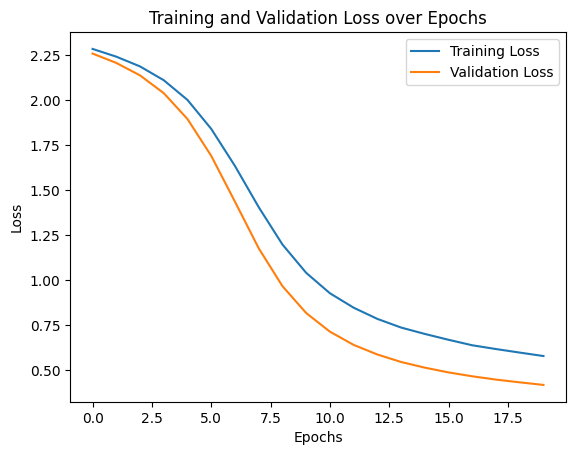

In [15]:
# Plot both validation loss and training loss
plt.plot(hist_2.history['loss'], label='Training Loss')
plt.plot(hist_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 2 with 30 epochs

In [16]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
batch_size = 128
num_classes = 10
epochs = 30
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))
model_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [19]:
hist_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_3.save('mnist_3.h5')
print("Saving the model as mnist_3.h5")

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1195 - loss: 2.3029 - val_accuracy: 0.3092 - val_loss: 2.2364
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2614 - loss: 2.2284 - val_accuracy: 0.6080 - val_loss: 2.1406
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4235 - loss: 2.1330 - val_accuracy: 0.6878 - val_loss: 2.0059
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5260 - loss: 1.9988 - val_accuracy: 0.7239 - val_loss: 1.8154
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5862 - loss: 1.8161 - val_accuracy: 0.7483 - val_loss: 1.5723
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6323 - loss: 1.5888 - val_accuracy: 0.7773 - val_loss: 1.3110
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6621 - loss: 1.3672 - val_accuracy: 0.8021 - val_loss: 1.0807
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6884 - loss: 1.1790 - val_accuracy: 0

The model has successfully trained
Saving the model as mnist_3.h5


In [20]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3194926083087921
Test accuracy: 0.9089999794960022


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


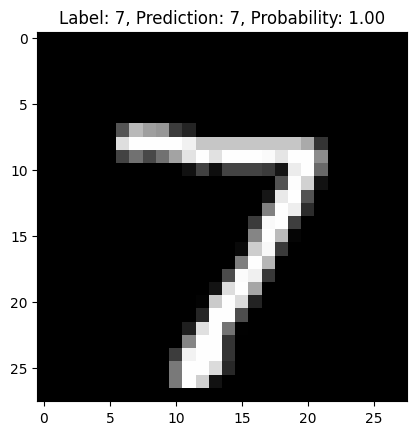

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


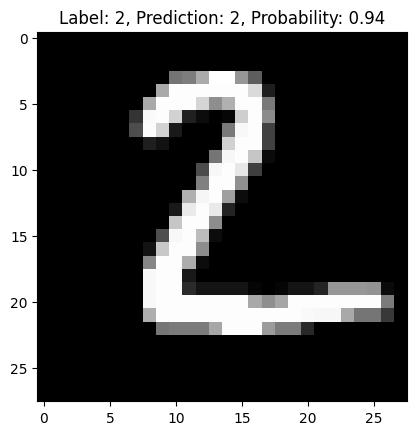

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


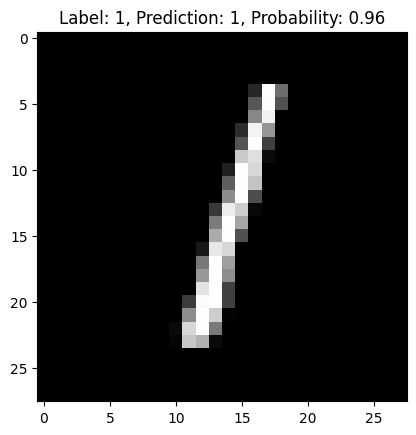

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


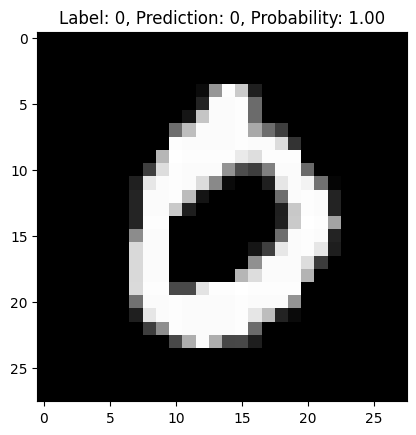

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


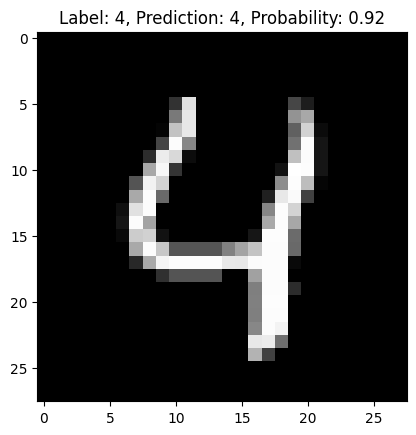

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


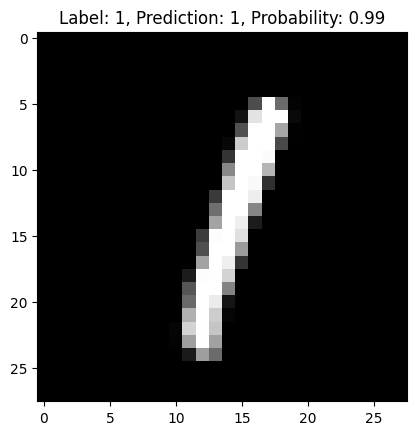

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


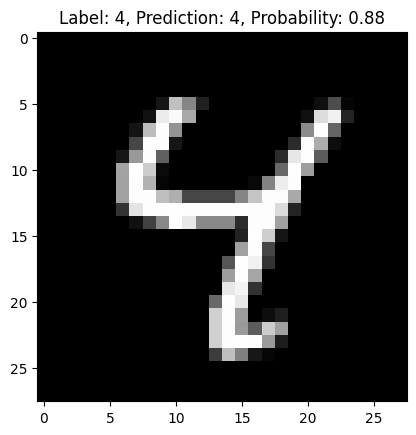

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


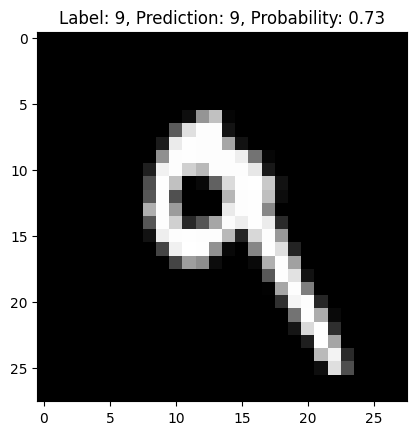

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


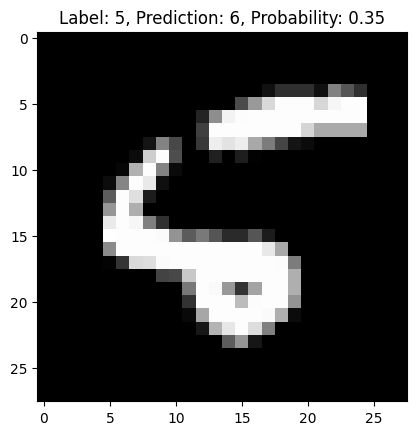

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


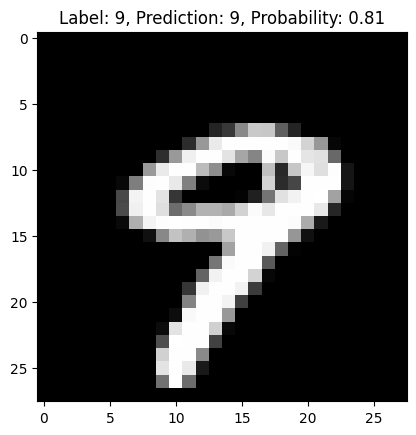

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_3.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


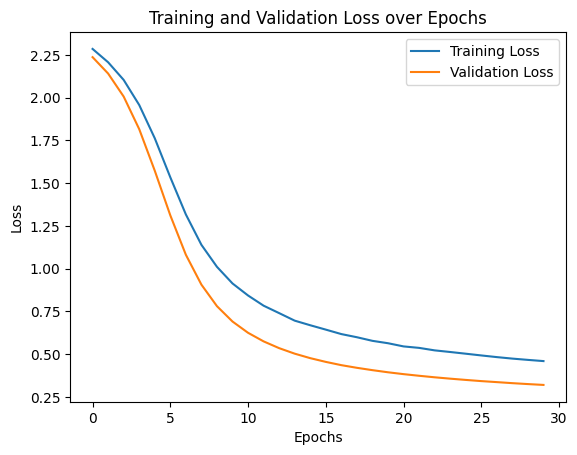

In [22]:
# Plot both validation loss and training loss
plt.plot(hist_3.history['loss'], label='Training Loss')
plt.plot(hist_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Improve the model accuracy version 3 with 50 epochs

In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [24]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
batch_size = 128
num_classes = 10
epochs = 50
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))
model_4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [26]:
hist_4=model_4.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model_4.save('mnist_4.h5')
print("Saving the model as mnist_4.h5")

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1170 - loss: 2.2922 - val_accuracy: 0.3010 - val_loss: 2.2458
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2404 - loss: 2.2389 - val_accuracy: 0.4756 - val_loss: 2.1756
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3633 - loss: 2.1692 - val_accuracy: 0.6060 - val_loss: 2.0746
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4669 - loss: 2.0687 - val_accuracy: 0.6799 - val_loss: 1.9266
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5432 - loss: 1.9231 - val_accuracy: 0.7239 - val_loss: 1.7221
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6005 - loss: 1.7263 - val_accuracy: 0.7568 - val_loss: 1.4735
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6386 - loss: 1.5007 - val_accuracy: 0.7858 - val_loss: 1.2201
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6764 - loss: 1.2838 - val_accuracy: 0

The model has successfully trained
Saving the model as mnist_4.h5


In [27]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26501497626304626
Test accuracy: 0.9232000112533569


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


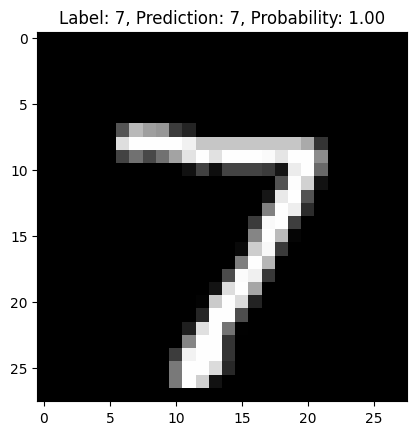

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


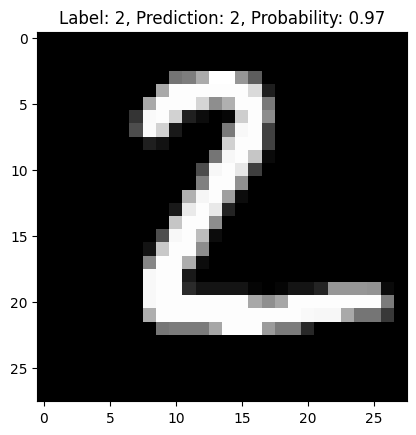

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


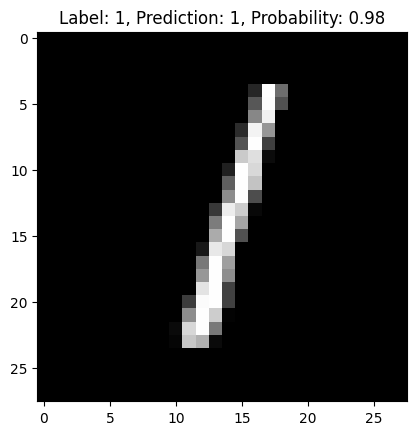

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


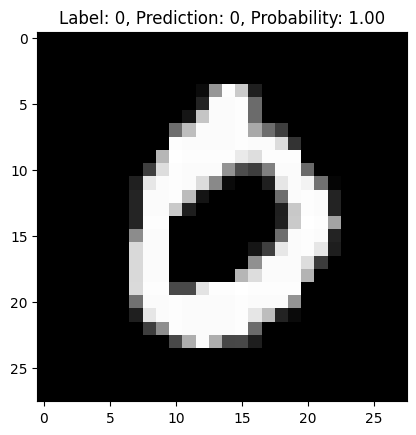

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


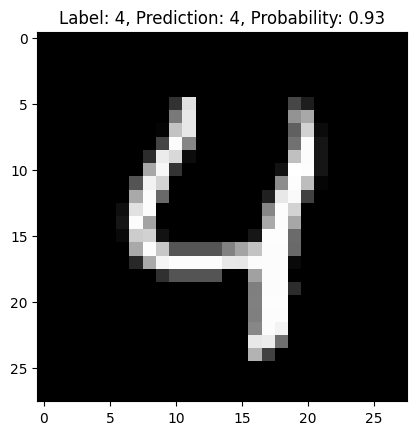

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


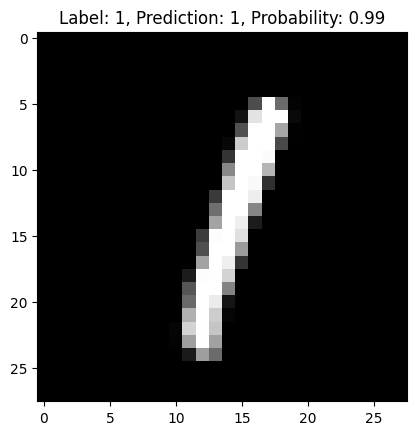

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


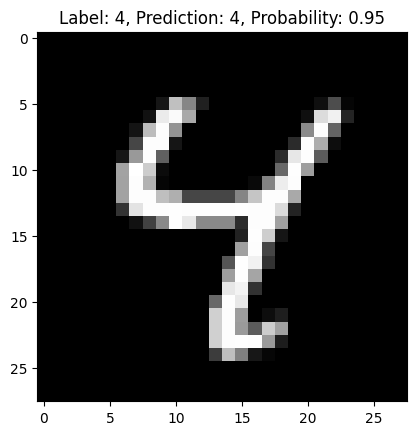

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


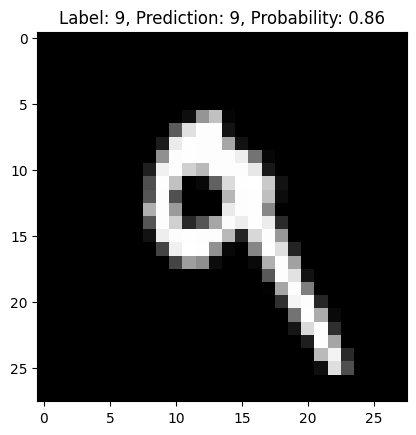

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


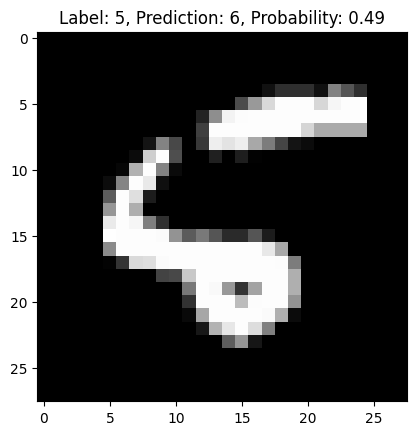

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


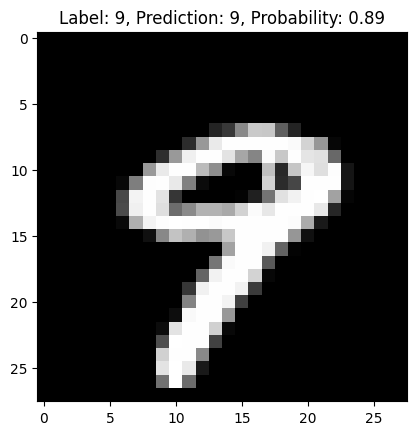

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist_4.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


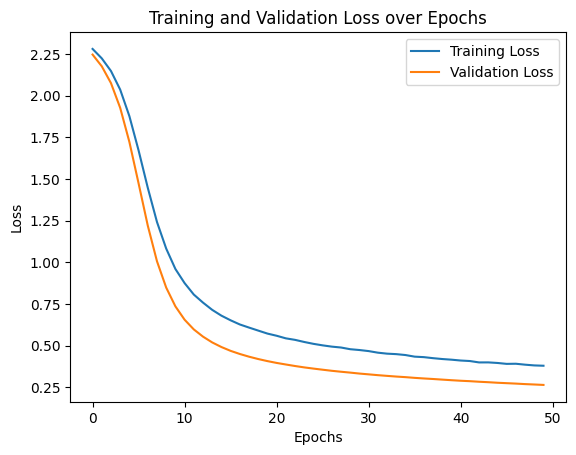

In [29]:
# Plot both validation loss and training loss
plt.plot(hist_4.history['loss'], label='Training Loss')
plt.plot(hist_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()